In [8]:
from numpy import exp, pi, sqrt, cos, sin
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.animation as animation
from matplotlib import rcParams
import time
import os.path
from os import path
import random
from math import floor
from matplotlib.colors import LinearSegmentedColormap
from butterpy.systems import Lorenz


ModuleNotFoundError: No module named 'butterpy'

In [5]:
print()

NameError: name '__path__' is not defined

Steps:
1. define function
2. evolve over time
3. plot points/surface/mesh
4. define camera sweep
5. remove axes
6. set background
7. create animation

In [ ]:
"""we'll start with a simple gaussian that spreads out over time"""

def gaussian(x,y):
    return exp(-((x-x0)**2 + (y-y0)**2)/(2*sig**2))/(sig*sqrt(2*pi))

In [ ]:
"""writing a lorenz attractor"""


class Lorenz:
    """
    TODO: accept dictionary for parameters
    TODO: enforce compliance to bounds _assert_conditons()
    """
    
    
    def __init__(self, init=(), pars=()):
        self._pos = [p for p in init] if len(init)==3 else Lorenz.randomize_pos()
        self._pars = [p for p in pars] if len(pars)==3 else Lorenz.randomize_pos()
        self.simulated = False
        self._assert_conditions()
        
    def _assert_conditions(self):
        pass 
    
    def system(self, state, t):
        """ Defines the 3d dynamical equation of the system"""
        x,y,z = state
        sigma,rho,beta = self.parameters
        return [
            sigma * (y - x),
            x * (rho - z) - y,
            x * y - beta * z
        ]
    
    def simulate(self, time_vect=None):
        time_vect = np.arange(0.0, 40.0, 0.01) if time_vect is None else time_vect
        self.positions = odeint(self.system, self.position, time_vect)
        self.simulated = True
        self.speeds = self.get_speeds()
        
    def get_derivatives(self):
        if not self.simulated:
            raise RuntimeError('Must evaluate system before getting derivatives')
        derivs = np.zeros_like(self.positions)
        for i in range(len(self.positions)):
            derivs[i,:] = self.system(self.positions[i,:], None)
        return derivs
    
    def get_speeds(self):
        speeds = list(map(lambda x: (x[0]**2 + x[1]**2 + x[2]**2)**0.5, self.get_derivatives()))
        return speeds
    
    def fixed_points(self):
        sigma,rho,beta = self.parameters
        if rho < 1:
            return [(0,0,0)]
        else:
            return [(sqrt(beta*(rho-1)), sqrt(beta*(rho-1)), rho-1),(-sqrt(beta*(rho-1)), -sqrt(beta*(rho-1)), rho-1)]
        
    @property
    def x(self):
        return self._pos[0]
    
    @property
    def y(self):
        return self._pos[1]
    
    @property
    def z(self):
        return self._pos[2]
    
    @property
    def position(self):
        return (self.x, self.y, self.z)
    
    @property
    def sigma(self):
        return self._pars[0]
    
    @property
    def rho(self):
        return self._pars[1]
    
    @property
    def beta(self):
        return self._pars[2]

    @property
    def parameters(self):
        return (self.sigma, self.rho, self.beta)
    
    @x.setter
    def x(self, val):
        self._pos[0] = val
    
    @y.setter
    def y(self, val):
        self._pos[1] = val
    
    @z.setter
    def z(self, val):
        self._pos[2] = val
        
    @position.setter
    def position(self, val):
        assert len(val) == 3, "This is a 3d system: position must be an iterable of length 3."
        self.x = val[0]
        self.y = val[1]
        self.z = val[2]
        
    @sigma.setter
    def sigma(self, val):
        self._pars[0] = val
    
    @rho.setter
    def rho(self, val):
        self._pars[1] = val
    
    @beta.setter
    def beta(self, val):
        self._pars[2] = val
        
    @parameters.setter
    def parameters(self, val): 
        assert len(val) == 3, "Must provide sigma, rho, and beta: parameters must be an iterable of length 3."
        self.sigma = val[0]
        self.rho = val[1]
        self.beta = val[2]
        
    @classmethod
    def randomize_pos(cls):
        """
        Random 3d point to use as initial position (and params right now)
        """
        print(f"Initial position given is invalid: using random position")
        import random
        random.seed()
        return [random.random() for _ in range(3)]
        

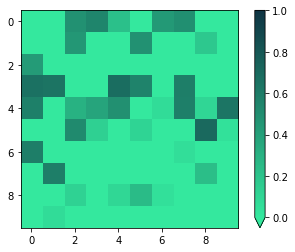

In [72]:
data = np.random.rand(10,10) * 2 - 1.3
fig, ax = plt.subplots()
im = ax.imshow(data, cmap=cmaps['pacificdream'], vmin=0, vmax=1)
fig.colorbar(im, extend="min")
plt.show()

In [12]:
""" Defining some different colour maps """

def get_file_lines(filename):
    with open(filename) as file:
        return [line for line in file]

def get_custom_cmaps(filename, mode='custom', map_name=None):
    lines = get_file_lines(filename)
    N_cmap_cols = 256
    cmaps = {}
    for l in lines:
        name,*colors = (s.strip() for s in l.split(','))
        if mode == 'segmented':
            """ segmented just uses MPL's built in LinearSegmentedColormap """
            nodes = np.linspace(0,1,len(colors))
            cmap = LinearSegmentedColormap.from_list("", list(zip(nodes, colors)))
            cmaps[name] = cmap
        if mode == 'custom':
            """ custom uses my own interpolation code """
            cols = [Color(cx) for cx in colors]
            n_arrays = len(cols_hex)-1
            cols_per_array = floor(N_cmap_cols/n_arrays)
            if interpolation_space.lower() == 'rgb':
                raise NotImplementedError()
            elif interpolation_space.lower() == 'hsv':
                raise NotImplementedError()
            elif interpolation_space.lower() == 'lch':
                raise NotImplementedError()
                ### this is broken -- in the middle of writing transformation from rgb-xyz-lab-lch (and back) ####
                colors_rgb = np.empty((3,N_cmap_cols), dtype=np.uint8)
                for i in range(n_arrays):
                    bot_rgb_hex = [colors[i][1+2*j:3+2*j] for j in range(3)]
                    top_rgb_hex = [colors[i+1][1+2*j:3+2*j] for j in range(3)]
                    for comp,bot,top in zip(range(3), bot_rgb_hex, top_rgb_hex):
                        b = int(bot,16)
                        t = int(top,16)
                        colors_rgb[comp, i*cols_per_array:(i+1)*cols_per_array] = [int((b+(t-b)*j/cols_per_array)) for j in range(cols_per_array)]
                        colors_rgb[comp, cols_per_array*n_arrays:] = t # pad any extra slots from rounding errors
                cmaps[name] = colors_rgb # convert this to a cmap
    return cmaps

cmaps_file = '..\\butterpy\plot\colors\cmaps.txt'

interpolation_space = 'lch' # or rgb, hsv
cmaps = get_custom_cmaps(cmaps_file, 'segmented')


In [14]:
def gen_lorenz(s0=None, parameters=None, t=np.arange(0.0, 5.0, 0.001)):
    random.seed()
    means = [10.0, 60.0, 4.20]
    stds = [2.0, 15.0, 1.0]
    parameters = [random.gauss(mu, si) for mu,si in zip(means,stds)] if parameters is None else parameters
    s0 = [random.uniform(1.0, parameters[1]*2) for i in range(3)] if s0 is None else s0
    syst = Lorenz(init=s0, pars=parameters)
    syst.simulate(t)
    return syst

In [15]:
# # Attaching 3D axis to the figure
# from mpl_toolkits.mplot3d import Axes3D

lorenz = gen_lorenz(t=np.arange(0.0,20.0,0.0005)) # s0=(-4.11,4.20,6.9), parameters=(8.69,54.6,8/3+0.02), 

# img = np.zeros((200,300,3))
cmap = plt.cm.get_cmap('viridis')

fig = plt.figure(figsize=(2.*16.*12./9., 2.*12.), dpi=512)
ax = fig.add_subplot(projection="3d")
ax.set_axis_off()
# ax.imshow(img, aspect='auto') #extent=[0, 400, 0, 300])
fig.set_facecolor('black')
ax.set_facecolor('black')

#colour = (0.0,0.0,0.0,1.0)
#set_bg(ax, colour)

#ax.plot(syst.history[:, 0], syst.history[:, 1], syst.history[:, 2], lw=0.3)
lines = []
for i in range(0,len(lorenz.positions)-1,1):
    lines.append(ax.plot(lorenz.positions.T[0, i:i+2], lorenz.positions.T[1, i:i+2], lorenz.positions.T[2, i:i+2], lw=0.8, color=cmap(lorenz.speeds[i]/max(lorenz.speeds)))[0]) #
#     if i < 10*line_len:
#         lines[i].set_visible(False)

plt.show()

NameError: name 'Lorenz' is not defined

In [99]:
# # Attaching 3D axis to the figure
# from mpl_toolkits.mplot3d import Axes3D

lorenz = gen_lorenz(t=np.arange(0.0,20.0,0.001)) # s0=(-4.11,4.20,6.9), parameters=(8.69,54.6,8/3+0.02), 

# img = np.zeros((200,300,3))
cmap = plt.cm.get_cmap('plasma')

fig = plt.figure(figsize=(2.*16.*12./9., 2.*12.), dpi=512)
ax = fig.add_subplot(projection="3d")
ax.set_axis_off()
# ax.imshow(img, aspect='auto') #extent=[0, 400, 0, 300])
fig.set_facecolor('black')
ax.set_facecolor('black')

#colour = (0.0,0.0,0.0,1.0)
#set_bg(ax, colour)

#ax.plot(syst.history[:, 0], syst.history[:, 1], syst.history[:, 2], lw=0.3)
lines = []
for i in range(0,len(lorenz.positions)-1,1):
    lines.append(ax.plot(lorenz.positions.T[0, i:i+2], lorenz.positions.T[1, i:i+2], lorenz.positions.T[2, i:i+2], lw=0.8, color=cmap(lorenz.speeds[i]/max(lorenz.speeds)))[0]) #
#     if i < 10*line_len:
#         lines[i].set_visible(False)

plt.show()

In [81]:
def rotation_matrix(c,b,a):
    cosa, cosb, cosc = cos(a), cos(b), cos(c)
    sina, sinb, sinc = sin(a), sin(b), sin(c)
    return np.array([
        [cosa*cosb, cosa*sinb*sinc - sina*cosc, cosa*sinb*cosc + sina*sinc],
        [sina*cosb, sina*sinb*sinc + cosa*cosc, sina*sinb*cosc - cosa*sinc],
        [-sinb, cosb*sinc, cosb*cosc]
    ])

In [186]:
def move_cam(view_dist):
    di = view_dist
    az = 0.0
    el = np.sqrt(0.5*di**2)
    
    distance_func = lambda: di# - 0.05
    azimuth_func = lambda: az + 1.1975
    elevation_func = lambda: el
    
    while True:
        di = distance_func()
        az = azimuth_func()
        el = elevation_func()
        yield di, az, el
    
#     # zoom in to reveal the 3-D structure of the strange attractor
#     for n in range(0, length):
#         if n <= length*.18:
#             ax.azim = ax.azim-0.02 #begin by rotating very slowly
#         if n >= length*.19 and n <= length*.29:
#             ax.azim = ax.azim-1
#             ax.dist = ax.dist-0.005
#             ax.elev = ax.elev-.2 #quickly whip around to the other side
#         if n >= length*.33 and n <= length*.49:
#             ax.azim = ax.azim+.3
#             ax.dist = ax.dist-0.055
#             ax.elev = ax.elev+1.4 #zoom into the center
#         if n >= length*.61 and n <= length*.79:
#             ax.azim = ax.azim-.2
#             ax.elev = ax.elev-.2
#             ax.dist = ax.dist+0.002 #pull back and pan up
#         if n >= length*.80:
#             ax.azim = ax.azim-0.02 #end by rotating very slowly

In [181]:
def update_lines(frame_num, data, lines, line_length, angles, scale):
    if line_length is None or plot_type == 'scatter':
        start = 0
    else:
        start = frame_num - line_length if frame_num > line_length else 0

    # get visible lines in the frame
    #to_plot = data[:, start:frame_num]

    # get rotation matrix for this frame
    #angle_xyz = angles[start]
    #rot = rotation_matrix(*angle_xyz)
    # get scale for this frame
    #scalar = scale[start]
    
    #ax.azim = 
    #ax.elev = 
    # 
    
    if plot_type == 'lines':
        lines[frame_num].set_visible(True) # add next line
        lines[start].set_visible(False) # remove furthest back line
        #for i in range(len(lines)):
            #line = lines[i]
            #if line.get_visible():
                #plot_data = scalar *  np.matmul(rot, to_plot) # transform all visible line 
                #line.set_data(plot_data[0:2, :])
                #line.set_3d_properties(plot_data[2, :])
                #line.set_color(cmap(speeds[i]/max(speeds)))
#         for i in range(1, len(plot_data)):
#             line = ax.plot(plot_data[0, i-1:i], plot_data[1, i-1:i], plot_data[2, i-1:i], lw=0.4, color=cmap(speeds_to_plot[i-1]/max(speeds)))[0]
    elif plot_type == 'scatter':
        ax.clear()
        ax.scatter(plot_data[0, :], plot_data[1, :], plot_data[2, :], s=5, c=[cmap(speed/max(speeds)) for speed in speeds_to_plot])
    return lines

def sigmoid(x,a,b,d,c):
    return a/(1+exp(-b*(x-d)))+c

In [182]:
# animation function
def update_lines(frame_num, data, lines, line_length, dot, camera_movement=None):
    start = max(0, frame_num - line_length)
    lines[frame_num].set_visible(True) # add next line
    lines[start].set_visible(False) # remove furthest back line
    dot.set_data(data[0:2, frame_num+1])
    dot.set_3d_properties(data[2, frame_num+1])
    if camera_movement is not None:
        ax.dist, ax.azim, ax.elev = next(camera_movement)
    return lines,dot

In [183]:
# Setting plot quality options
#TODO: set fig params, animation params, sim params
PARS_TEST = {
    "dpi":128,
    "br":1024,
    "fps":30,
    "intvl":1000,
    "n_skip":1,
    "sim_time":3.0,
    "sim_dt":0.01,
}

PARS_PROD = {
    "dpi":420,
    "br":2048,
    "fps":60,
    "intvl":1,
    "n_skip":1,
    "sim_time":15.0,
    "sim_dt":0.001,
}

#plot_type = 'scatter'
plot_type = 'lines'

In [188]:
starttime = time.time()

""" Set video parameters """
dpi, br, fps, intvl, n_skip, sim_time, sim_dt = PARS_PROD.values()

""" Get data from simulated system """
animated_lorenz = gen_lorenz(t=np.arange(0.0,sim_time,sim_dt)) # TODO: change to Lorenz.generate_simulation()
data = animated_lorenz.positions.T
for x in range(3):
    data[x,:] -= data[x,:].mean()
speeds = animated_lorenz.get_speeds()

In [ ]:
""" Make figure and set up axes """
fig = plt.figure(dpi=dpi)
ax = fig.add_subplot(projection="3d")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

# f = 1.5
# x_min = min(data[0,:])
# x_max = max(data[0,:])
# ax.set_xlim3d([f*x_min, f*x_max])
# y_min = min(data[1,:])
# y_max = max(data[1,:])
# ax.set_ylim3d([f*y_min, f*y_max])
# z_min = min(data[2,:])
# z_max = max(data[2,:])
# ax.set_zlim3d([f*z_min, f*z_max])

ax.set_axis_off() # don't plot on axes
line_colour = 'plasma'
cmap = plt.cm.get_cmap(line_colour) # line colour map
# set background colour
bg_colour = "#000000"
fig.set(facecolor=bg_colour)
ax.set(facecolor=bg_colour)

line_fraction = 0.5
line_len = int(line_fraction*data.shape[1])
frame_nums = range(line_len, data.shape[1]-1, n_skip) # frames begin after initial line plot

""" Viewpoint animation """
camera = move_cam(view_dist=6)
ax.dist,ax.azim,ax.elev = next(camera)
    
""" Plot objects """
lines = []
for i in range(0,len(data[0])-1,1):
    lines.append(ax.plot(data[0, i:i+2], data[1, i:i+2], data[2, i:i+2], lw=0.4, color=cmap(speeds[i]/max(speeds)))[0])
    if i >= line_len:
        lines[i].set_visible(False)
        if i == line_len+2:
            dot = ax.plot(data[0, i], data[1, i], data[2, i], '.', markersize=1.5, color='white', linestyle='None')[0]
            
""" Make and save animation """
metadata = {
    "artist": 'Hugh Morison',
    "title": 'Lonrenz',
    "comment": f'System parameters: rho={animated_lorenz.rho}, beta={animated_lorenz.beta}, sigma={animated_lorenz.sigma}',
}
version = 0
filepath = "videos/tests/"
filename = filepath + f'lorenz_LC{line_colour}_BG{bg_colour}_v{version}.mp4'
while path.exists(filename):
    version += 1
    filename = filepath + f'lorenz_LC{line_colour}_BG{bg_colour}_v{version}.mp4'

Writer = animation.writers['ffmpeg']
writer = Writer(fps=fps, metadata=metadata, bitrate=br) #, extra_args=extras)

line_ani = animation.FuncAnimation(
    fig, update_lines, frame_nums, fargs=(data, lines, line_len, dot, camera), interval=intvl)

line_ani.save(filename, writer=writer, dpi=dpi)

endtime = time.time()
print(f"Done rendering: saved as {filename}\nTook {endtime-starttime} seconds. Rendering params are\n\tdpi={dpi}\n\tbit rate={br}\n\tfps={fps}\n\tinterval={intvl}\n\tframe skip={n_skip}")